In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
import pickle

import warnings
warnings.simplefilter("ignore")

c:\Users\DELL\anaconda3\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


In [2]:
df = pd.read_csv("weatherAUS.csv.zip")
df = df.dropna()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [3]:
df["Location"].unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000


In [5]:
df.shape

(56420, 23)

In [6]:
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
melb_df = df[df["Location"]=="Melbourne"]

# EDA

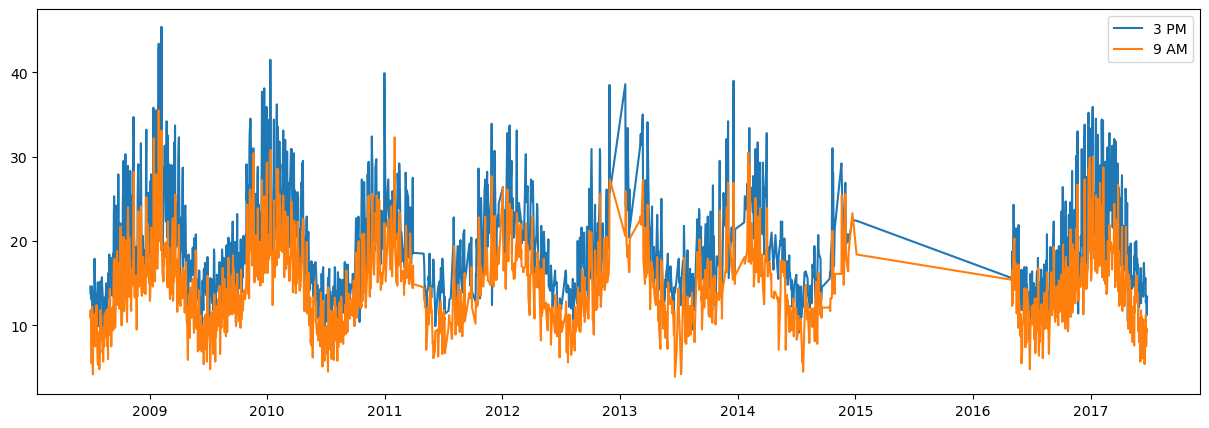

In [8]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(melb_df["Date"], melb_df["Temp3pm"])
plt.plot(melb_df["Date"],melb_df["Temp9am"])
plt.legend(["3 PM", "9 AM"])
plt.show()

In [9]:
melb_df['year'] = melb_df["Date"].apply(lambda x:x.year)

melb_df = melb_df[melb_df["year"]<=2015]

melb_df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
69463,2014-12-09,Melbourne,15.5,21.7,0.0,4.6,9.1,SSE,33.0,S,...,49.0,1016.4,1015.0,7.0,3.0,16.6,20.8,No,No,2014
69464,2014-12-10,Melbourne,13.7,21.3,0.0,5.4,0.4,SSE,31.0,N,...,66.0,1012.5,1011.1,7.0,7.0,16.4,20.0,No,No,2014
69465,2014-12-11,Melbourne,16.3,22.1,0.6,2.8,5.8,S,52.0,S,...,64.0,1015.1,1017.4,7.0,6.0,18.6,19.9,No,No,2014
69477,2014-12-23,Melbourne,19.9,26.8,1.2,4.0,1.4,SSW,44.0,NNW,...,70.0,1008.0,1008.2,7.0,7.0,23.3,22.5,Yes,No,2014
69490,2015-01-05,Melbourne,15.6,23.9,0.2,6.4,10.3,SSE,35.0,SSE,...,58.0,1020.3,1019.4,7.0,7.0,18.4,22.4,No,No,2015


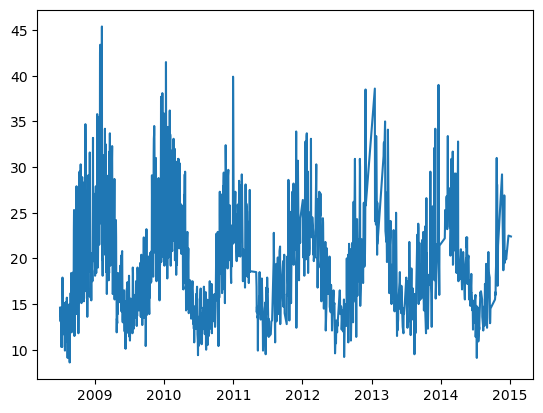

In [10]:
plt.plot(melb_df["Date"], melb_df["Temp3pm"])
plt.show()

In [11]:
melb_df = melb_df.rename(columns={"Date":"ds", "Temp3pm":"y"})

melb_df

,ds,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,y,RainToday,RainTomorrow,year
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No,2008
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes,2008
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No,2008
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No,2008
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69463,2014-12-09,Melbourne,15.5,21.7,0.0,4.6,9.1,SSE,33.0,S,...,49.0,1016.4,1015.0,7.0,3.0,16.6,20.8,No,No,2014
69464,2014-12-10,Melbourne,13.7,21.3,0.0,5.4,0.4,SSE,31.0,N,...,66.0,1012.5,1011.1,7.0,7.0,16.4,20.0,No,No,2014
69465,2014-12-11,Melbourne,16.3,22.1,0.6,2.8,5.8,S,52.0,S,...,64.0,1015.1,1017.4,7.0,6.0,18.6,19.9,No,No,2014
69477,2014-12-23,Melbourne,19.9,26.8,1.2,4.0,1.4,SSW,44.0,NNW,...,70.0,1008.0,1008.2,7.0,7.0,23.3,22.5,Yes,No,2014


In [12]:
melb_df_NP = melb_df[["ds","y"]]
melb_df_NP

,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6
...,...,...
69463,2014-12-09,20.8
69464,2014-12-10,20.0
69465,2014-12-11,19.9
69477,2014-12-23,22.5


In [13]:
m = NeuralProphet()
metrics = m.fit(melb_df_NP, freq="D")
future = m.make_future_dataframe(melb_df_NP, periods=365, n_historic_predictions=len(melb_df_NP)) 
forecast = m.predict(future)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 82.865% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 172
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (47) is too small than the required number for the learning rate finder (230). The results might not be optimal.


Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 82.865% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 86.229% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 86.229% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 47it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [14]:
m.plot(forecast)

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> yhat1 <i style="color:#fc9944">~3D</i>',
              'type': 'scatter',
              'uid': '33271403-6b04-4d43-a05c-1670424170fe',
              'x': array([datetime.datetime(2008, 7, 1, 0, 0),
                          datetime.datetime(2008, 7, 2, 0, 0),
                          datetime.datetime(2008, 7, 4, 0, 0), ...,
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0),
                          datetime.datetime(2016, 1, 5, 0, 0)], dtype=object),
              'y': array([13.83271599, 13.6275177 , 13.68128681, ..., 23.31393242, 23.11618423,
                          24.11301804])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': '<